### Baseline

In [175]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn import metrics

from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Read data (source: https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame)

Because the data has no headers included, I will create these myself

In [176]:
feature_cols=[
    "top-left", "top-middle", "top-right", 
    "middle-left", "middle-middel", "middle-right", 
    "bottom-left", "bottom-middle", "bottom-right", 
    
    ]
tictactoe_df = pd.read_csv("data/tic-tac-toe.data",
                           sep=',',
                           header=None, 
                           names=feature_cols+["x has won"]
                           )
                           
tictactoe_df

,top-left,top-middle,top-right,middle-left,middle-middel,middle-right,bottom-left,bottom-middle,bottom-right,x has won
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


Exploratory Data Analysis 


kijk data na, minimum requerements berijkt?

In [177]:
print(tictactoe_df.describe())
print(tictactoe_df.isna().sum())

       top-left top-middle top-right middle-left middle-middel middle-right  \
count       958        958       958         958           958          958   
unique        3          3         3           3             3            3   
top           x          x         x           x             x            x   
freq        418        378       418         378           458          378   

       bottom-left bottom-middle bottom-right x has won  
count          958           958          958       958  
unique           3             3            3         2  
top              x             x            x  positive  
freq           418           378          418       626  
top-left         0
top-middle       0
top-right        0
middle-left      0
middle-middel    0
middle-right     0
bottom-left      0
bottom-middle    0
bottom-right     0
x has won        0
dtype: int64


unbalanced features:

We see that x (first player) is in all locations on the board more used than b (other player). This is normal because when x wins, he has had 1 turn more than b. And when b wins, they had the same amount of wins. So it is normal that x occurs more.

In [178]:
for column in tictactoe_df.columns:
    value_counts = tictactoe_df[column].value_counts()
    print(f"Counts for {column}:\n{value_counts}\n")

Counts for top-left:
top-left
x    418
o    335
b    205
Name: count, dtype: int64

Counts for top-middle:
top-middle
x    378
o    330
b    250
Name: count, dtype: int64

Counts for top-right:
top-right
x    418
o    335
b    205
Name: count, dtype: int64

Counts for middle-left:
middle-left
x    378
o    330
b    250
Name: count, dtype: int64

Counts for middle-middel:
middle-middel
x    458
o    340
b    160
Name: count, dtype: int64

Counts for middle-right:
middle-right
x    378
o    330
b    250
Name: count, dtype: int64

Counts for bottom-left:
bottom-left
x    418
o    335
b    205
Name: count, dtype: int64

Counts for bottom-middle:
bottom-middle
x    378
o    330
b    250
Name: count, dtype: int64

Counts for bottom-right:
bottom-right
x    418
o    335
b    205
Name: count, dtype: int64

Counts for x has won:
x has won
positive    626
negative    332
Name: count, dtype: int64



split data in training set and testing set

In [179]:
X = tictactoe_df[feature_cols] # Features
y = tictactoe_df[['x has won']] # target variable
  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


Encoding the data want strings worden in scikit niet gebruikt, dus encoden we deze naar getallen. Hot encoden ook mogelijk (waarom dewelke gekozen?)

In [180]:
import category_encoders as ce

ce_ord = ce.OrdinalEncoder(cols = feature_cols)
X_train_cat = ce_ord.fit_transform(X_train)
X_test_cat = ce_ord.fit_transform(X_test)

# hot encoding
# ce_oh = ce.OneHotEncoder(cols = feature_cols)
# X_cat_oh = ce_oh.fit_transform(X)


create model (kies entropy of gini zoek op wat het verschil is tussen de 2)

In [181]:
clf_baseline = DecisionTreeClassifier(criterion = "entropy")
clf_baseline = clf_baseline.fit(X_train_cat, y_train)

teken decision tree

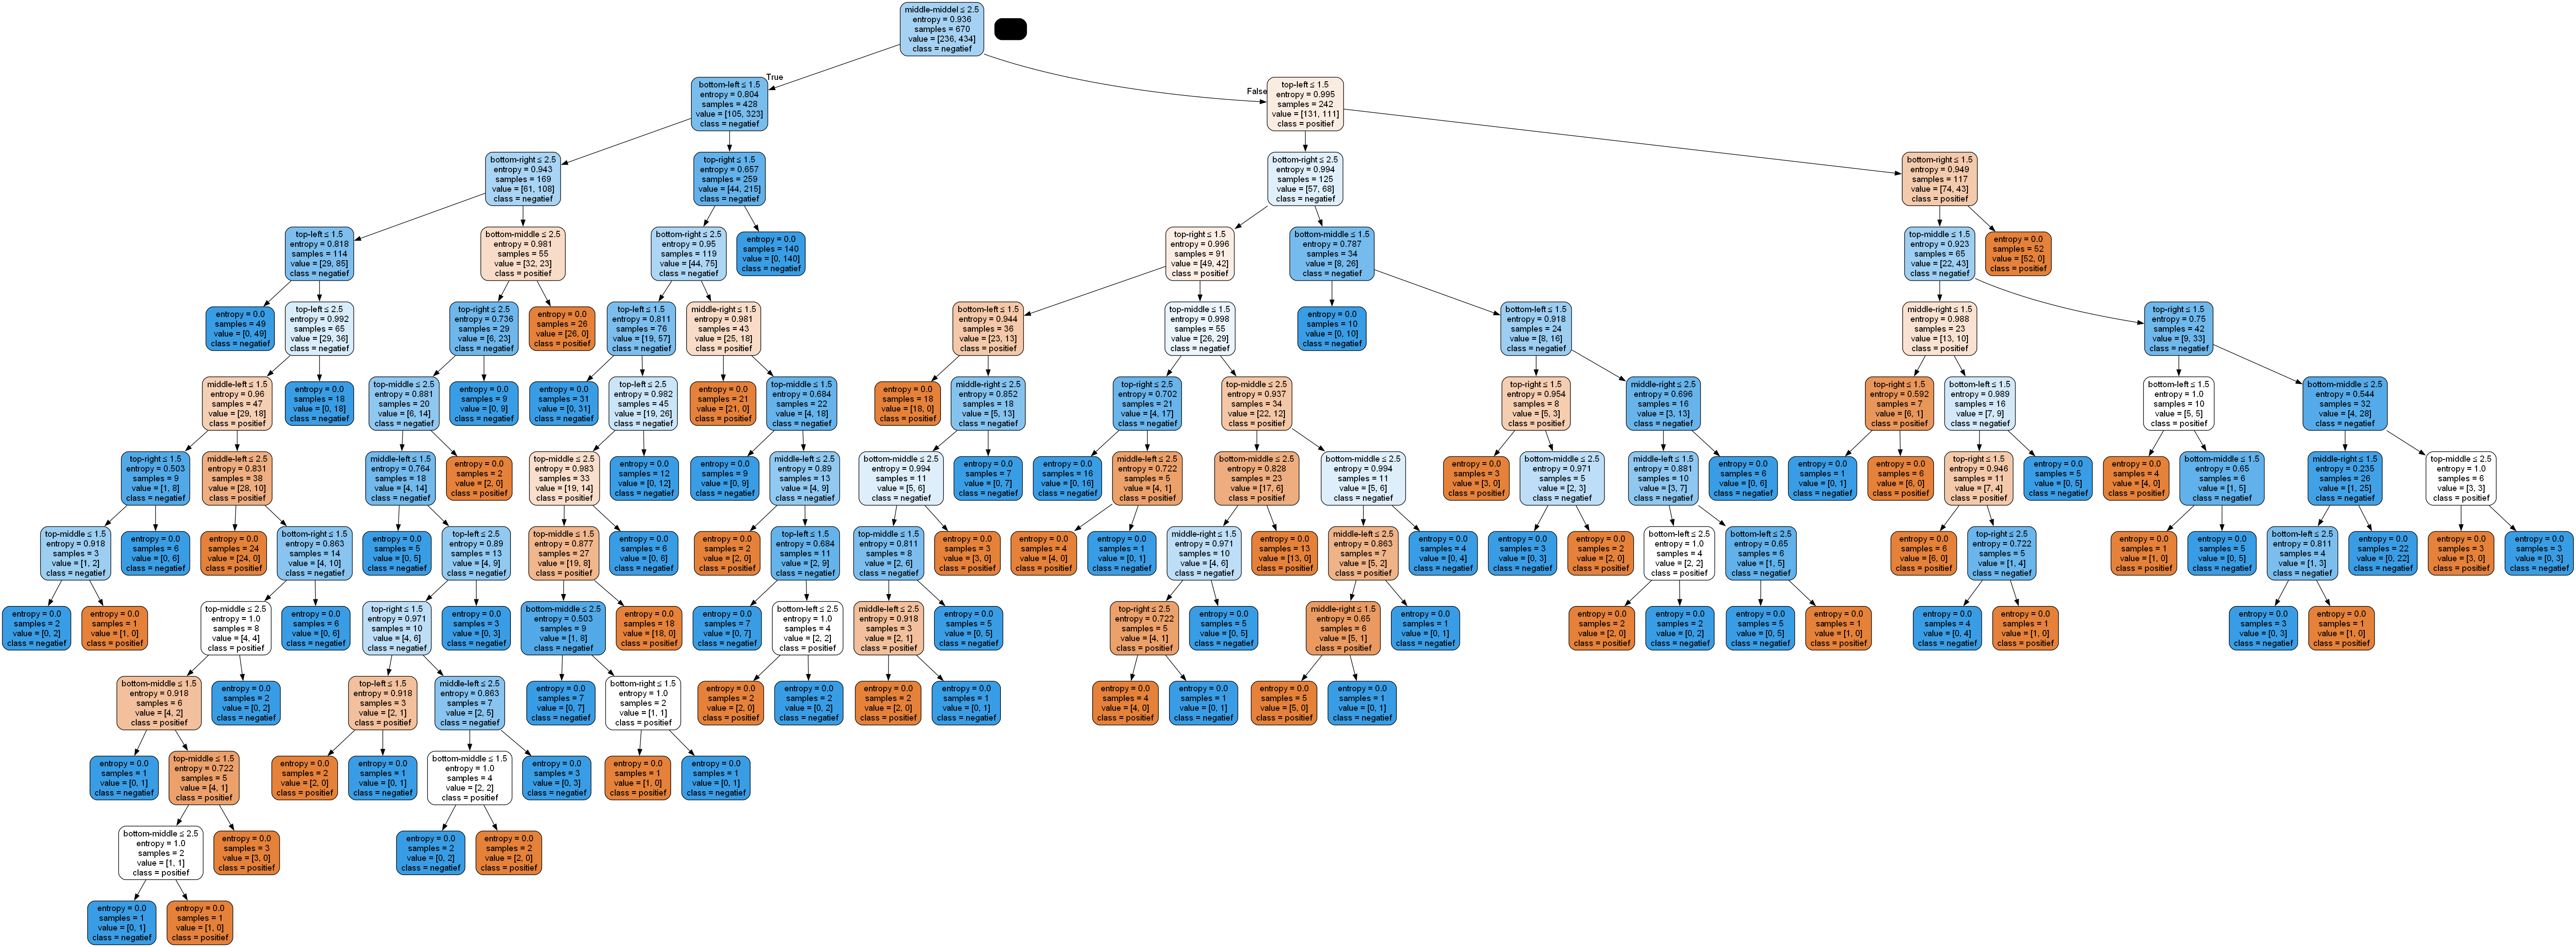

In [182]:
dot_data = StringIO()
export_graphviz(clf_baseline, 
                out_file = dot_data, 
                filled = True, 
                rounded = True,
                special_characters = True, 
                feature_names = feature_cols, 
                class_names=['positief', 'negatief']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=2000)

predictions

In [183]:
y_pred = clf_baseline.predict(X_test_cat)

confusion matrix

In [184]:

confusion_baseline = confusion_matrix(y_test, y_pred, labels = ["positive", "negative"])
print(f"Confusion matrix: \n{confusion_baseline}")

# Good predictions: 
correct_predictions = confusion_baseline.diagonal().sum()
print(f"Amount of correct predictions: {correct_predictions}")

# Total number:
total_predictions = confusion_baseline.sum()
print(f"Total amount of predictions: {total_predictions}")

# Accuracy:
print(f"Accuracy: {correct_predictions/total_predictions}")
# Ook mogelijk voor accuracy: print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")


Confusion matrix: 
[[145  47]
 [ 83  13]]
Amount of correct predictions: 158
Total amount of predictions: 288
Accuracy: 0.5486111111111112
